# IMPORTING DEPENDENCIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRFRegressor
from sklearn import metrics

#IMPORTING THE BOSTON HOUSE PRICE DATASET

In [2]:
house_price_dataset = sklearn.datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
house_price_dataset

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

# LOADING THE DATASET WITH PANDAS DATAFRAME

In [4]:
house_price_df = pd.DataFrame(data = house_price_dataset.data, 
                              columns=house_price_dataset.feature_names)

In [5]:
house_price_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#ADD THE TARGET COLOUMN TO THE DATASET

In [6]:
house_price_df['Price'] = house_price_dataset.target

In [7]:
house_price_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#CHECKING THE NUMBER OF ROWS & COLUMNS 

In [8]:
house_price_df.shape

(506, 14)

#CHECKING FOR NULL VALUES IN THE DATA

In [9]:
house_price_df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
house_price_df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

#STATISTICAL MEASURES OF THE DATASET

In [11]:
house_price_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#UNDERSTANDING THE CORRELATION BETWEEN VARIOUS FEATURES IN THE DATASET



1.   POSITIVE CORELATION 
2.   NEGATIVE CORELATION



In [12]:
correlation = house_price_df.corr()

#CONSTRUCTING A HEATMAP TO UNDERSTAND CORRELATION BETWEEN VARIOUS FEATURES IN THE DATASET

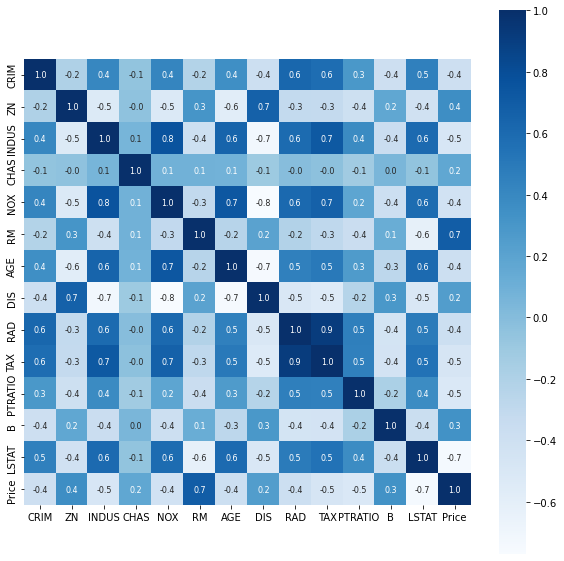

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={"size":8}, cmap="Blues")

#SPLITTING THE DATA AND TARGET

In [19]:
X = house_price_df.drop(columns="Price", axis=1)
Y = house_price_df["Price"]

In [20]:
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

In [21]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64


#SPLITTING THE DATA INTO TRAINING AND TEST DATA

> Indented block



In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


#MODEL TRAINING



1.   XGBoost Regressor



In [26]:
# Loading the model
model = XGBRFRegressor()

In [27]:
# Training the model with X_train
model.fit(X_train, Y_train)

[16:44:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRFRegressor()

#MODEL EVALUATION 



1.   PREDICTION ON TRAINING DATA



In [30]:
# Accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [32]:
training_data_prediction.shape

(404,)

In [31]:
print(training_data_prediction)

[24.26097   23.937279  20.795095  34.678898  17.572048  14.097384
 20.537981  16.403696  12.070563  20.26593   15.364628  10.941337
 26.76523   29.387794  32.45916   20.57872   23.951025  20.601912
 33.815083  20.506857  24.623003  11.109909  40.909138  20.645123
 17.505491  20.504509  20.822424  27.183193  20.645123  33.550327
 20.683706  11.11836   20.674335  16.958675  12.095911  11.256641
 13.076128  20.767534  17.01101   15.447571  24.259064  30.94419
 14.228413  16.311405  17.086775  16.693718  24.510582  16.900564
 40.909138  19.273033  20.724445  31.855907  16.715927  24.28798
 20.58119   23.934807  20.58119   32.236374  27.75429   32.13063
 20.63986   38.83841   14.931303  10.566486  24.012209  11.514686
 23.501461  17.51859   20.683706  40.909138  38.35905   33.749577
 23.96692   32.826275  24.248508  40.396328  15.01451   19.20232
 23.930414  24.012209  33.132637  23.979893  24.291822  19.456394
 40.701645  19.374865  33.48482   33.749577  10.3852215 23.744871
 16.850208  12

In [34]:
# R SQUARED ERROR 
score_1 = metrics.r2_score(Y_train, training_data_prediction)


# MEAN ABSOLUTE ERROR
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R SQUARED ERROR:", score_1)
print("MEAN ABSOLUTE ERROR:", score_2)

R SQUARED ERROR: 0.821063060730745
MEAN ABSOLUTE ERROR: 2.640049894257347


# PREDICTION ON TEST DATA

In [35]:
# Accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [36]:
print(test_data_prediction)

[19.35483  19.7516   34.58816  24.538847 10.999069 15.364654 23.574799
 29.788872 15.057265 19.674623 24.446342 24.088846 23.937279 20.536
 11.180333 23.958597 17.130493 11.783113 10.999069 13.632226 24.30859
 20.538546 33.39814  18.783934 13.763054 20.53353  39.272854 33.851326
 34.116405 23.951025 17.704632 23.934807 29.35503  25.93734  12.983863
 16.008179 12.078683 20.357122 20.752014 20.68163  24.088846 16.836689
 32.73617  10.941337 19.658222 14.001202 34.83526  15.867065 29.0522
 12.748105 29.579948 23.813883 10.941337 32.333626 18.468187 20.506857
 20.735796 17.968208 17.540262 17.757793 17.913319 24.068245 17.87011
 28.998278 29.619457 24.924706 40.909138 23.574799 12.550637 24.012209
 16.804165 10.999069 23.701658 16.218636 23.936447 27.121729 20.382343
 20.688082 20.822424 23.443796 34.14458  17.772764 18.405237 26.98485
 40.701645 33.39814  17.751894 23.989607 30.151299 20.487848 23.937279
 20.599442 11.569439 34.94847  36.034397 11.180333 40.701645 34.750946
 17.913319 16.

In [37]:
# R SQUARED ERROR 
score_1 = metrics.r2_score(Y_test, test_data_prediction)


# MEAN ABSOLUTE ERROR
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R SQUARED ERROR:", score_1)
print("MEAN ABSOLUTE ERROR:", score_2)

R SQUARED ERROR: 0.8517048643795635
MEAN ABSOLUTE ERROR: 2.8000569960650274


# VISUALIZE THE ACTUAL PRICES AND PREDICTED PRICES

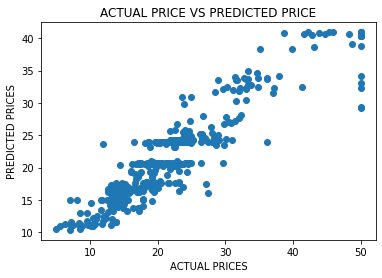

<Figure size 720x720 with 0 Axes>

In [44]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("ACTUAL PRICES")
plt.ylabel("PREDICTED PRICES")
plt.title("ACTUAL PRICE VS PREDICTED PRICE")
plt.figure(figsize=(10,10))
plt.show()